# Configuración Inicial

In [ ]:
#https://www.nltk.org/py-modindex.html

import nltk
nltk.download('book') #Se utiliza la función nltk.download() para descargar el corpus "book"
from nltk.book import * #Se importa el módulo nltk.book para acceder a los textos contenidos en el corpus "book".

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloadi

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


#Bi-gramas
* Parejas de palabras que ocurren consecutivas.

In [ ]:
from nltk.util import bigrams #Voy a usar la funcion bigrams de nltk.util module. No haria falta esta linea al haber llamado a import nltk(que importa toda la libreria)
                              #Un modulo de una libreria tiene clases y funciones

md_bigrams = list(bigrams(text1)) #Se utiliza la función bigrams() de nltk para obtener una lista de bigramas a partir del texto text1.
                                  #nltk.util.bigrams()
fdist = FreqDist(md_bigrams) #from nltk.probability import FreqDist. Calcula la freq dist de los elementos de la lista md_bigrams
md_bigrams[:10]

[('[', 'Moby'),
 ('Moby', 'Dick'),
 ('Dick', 'by'),
 ('by', 'Herman'),
 ('Herman', 'Melville'),
 ('Melville', '1851'),
 ('1851', ']'),
 (']', 'ETYMOLOGY'),
 ('ETYMOLOGY', '.'),
 ('.', '(')]

Buscar un bigrama en particular en la lista md_bigrams

In [ ]:
desired_tuple = ('Moby', 'Dick')

try:
    index = md_bigrams.index(desired_tuple) #devuelve el indice de la lista bigrams donde se encuenta el bigrama buscado
    print(f"The tuple {desired_tuple} is found at index {index}.")
except ValueError:
    print(f"The tuple {desired_tuple} is not found in the list.")

The tuple ('Moby', 'Dick') is found at index 1.


Aqui podemos obtener los bi-gramas más frecuentes en este texto:

In [ ]:
len(md_bigrams) #cantidad de bigramas

260818

In [ ]:
len(fdist) #cantidad de bigramas que se repiten

118748

In [ ]:
fdist.most_common(10) #Los 10 bigramas que mas se repiten, mas comunes

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

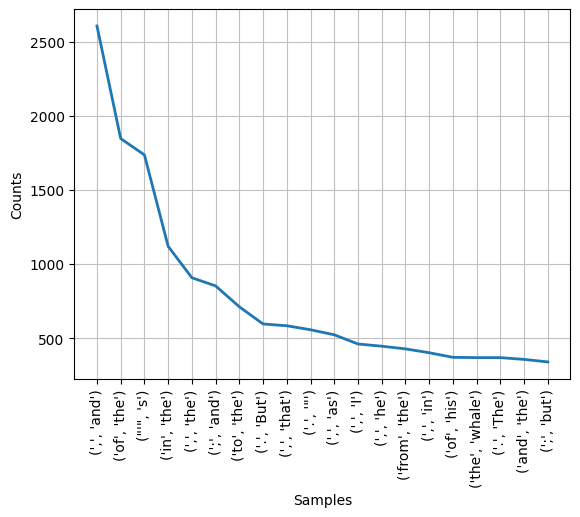

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot(20) #plot de los 20 bigramas que mas se repiten

## Filtrado de bi-gramas
* Sin embargo, observamos que los bi-gramas más comunes no representan realmente frases o estructuras léxicas de interes.
* Tal vez, aplicar algun tipo de filtro nos permita ver estructuras más relevantes.

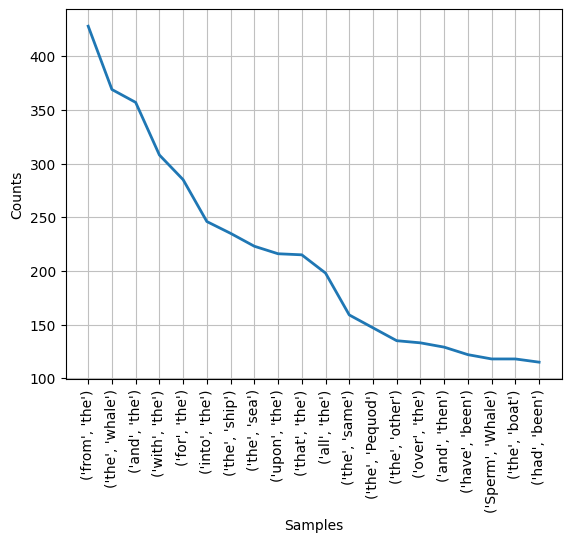

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
threshold = 2 #condicion.
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold] #El nombre de esa estructura de código es una comprensión de lista. md_bigrams es una lista de tuplas [("word0","word1")]
filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.plot(20)

# Tri-gramas

In [ ]:
from nltk.util import ngrams
md_trigrams = list(ngrams(text1,3)) #lista de trigramas a partir del texto text1.
                                    #La función ngrams() toma dos argumentos: la secuencia de palabras de entrada y el valor n que indica el tamaño de los n-gramas que se desean
                                    #obtener (en este caso, se especifica n=3 para obtener trigramas).
fdist = FreqDist(md_trigrams)
md_trigrams[:10]

[('[', 'Moby', 'Dick'),
 ('Moby', 'Dick', 'by'),
 ('Dick', 'by', 'Herman'),
 ('by', 'Herman', 'Melville'),
 ('Herman', 'Melville', '1851'),
 ('Melville', '1851', ']'),
 ('1851', ']', 'ETYMOLOGY'),
 (']', 'ETYMOLOGY', '.'),
 ('ETYMOLOGY', '.', '('),
 ('.', '(', 'Supplied')]

In [ ]:
fdist.most_common(10)

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

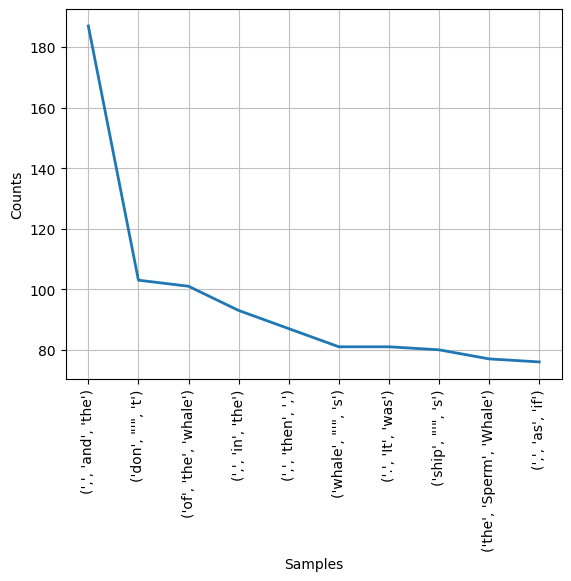

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot(10)

# Collocations (Colocaciones)

* Son secuencias de palabras que suelen ocurrir en textos o conversaciones con una **frecuencia inusualmente alta** [NLTK doc](http://www.nltk.org/book/ch01.html)
* Las colocaciones de una palabra son declaraciones formales de donde suele ubicarse tipicamente esa palabra [Manning & Schütze, 1990, Foundations of Statistical Natural Language Processing, Capítulo 6](https://nlp.stanford.edu/fsnlp/)

Las colocaciones de texto son secuencias de palabras que tienden a aparecer juntas con una frecuencia mayor de lo que se esperaría por azar. Son combinaciones lingüísticas en las que las palabras adquieren un significado especial cuando se usan en conjunto, y su significado no se puede deducir fácilmente a partir de las definiciones individuales de las palabras que las componen.

Las colocaciones son una parte importante del lenguaje natural y **reflejan la forma en que los hablantes nativos combinan palabras en su discurso cotidiano.** Algunos ejemplos comunes de colocaciones incluyen "tomar una decisión", "hacer un esfuerzo", "saltar a la conclusión" y "romper el hielo". Estas combinaciones de palabras tienen un significado específico y suelen ser reconocidas como unidades coherentes por los hablantes nativos del idioma.

In [ ]:
md_bigrams = list(bigrams(text1))

threshold = 2
#distribution of bi-grams
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_bigram_dist = FreqDist(filtered_bigrams)
#distribution of words
filtered_words = [word for word in text1 if len(word)>threshold]
filtered_word_dist = FreqDist(filtered_words)

#construimos un DataFrame
df = pd.DataFrame()
df['bi_gram'] = list(set(filtered_bigrams)) # construye el DF con los bigramas filtrados con el criterio de >2 caracteres. set(filterd_diagrams) elementos que no se repiten
df['word_0'] = df['bi_gram'].apply(lambda x: x[0])
df['word_1'] = df['bi_gram'].apply(lambda x: x[1])
df['bi_gram_freq'] = df['bi_gram'].apply(lambda x: filtered_bigram_dist[x])
df['word_0_freq'] = df['word_0'].apply(lambda x: filtered_word_dist[x])
df['word_1_freq'] = df['word_1'].apply(lambda x: filtered_word_dist[x])
df

,bi_gram,word_0,word_1,bi_gram_freq,word_0_freq,word_1_freq
0,"(his, brain)",his,brain,7,2459,37
1,"(some, dreadful)",some,dreadful,1,578,6
2,"(Oriental, seas)",Oriental,seas,1,6,80
3,"(and, shake)",and,shake,1,6024,15
4,"(book, with)",book,with,2,38,1659
...,...,...,...,...,...,...
67937,"(God, which)",God,which,1,132,640
67938,"(mates, were)",mates,were,4,39,680
67939,"(and, chaste)",and,chaste,1,6024,1
67940,"(your, hold)",your,hold,1,240,89


# Pointwise Mutual Information (PMI)
(Informacion Mutua Punto A Punto)

Una métrica basada en _teoria de la información_ para encontrar **Collocations**.

$$
PMI = \log\left(\frac{P(w_1, w_2)}{P(w_1)P(w_2)}\right)
$$

La métrica PMI (Pointwise Mutual Information) en el contexto del procesamiento del lenguaje natural (PNL). PMI es una medida estadística que se utiliza para medir la asociación entre dos elementos en un corpus de texto (bigrama)

La PMI se calcula a partir de las frecuencias de ocurrencia de dos elementos en un corpus y se basa en la idea de que si dos elementos ocurren juntos más frecuentemente de lo esperado que por separado, entonces existe una asociación positiva entre ellos.

P(w1,w2): probabilidad que ocurra w1 y w2
P(w1):probabilidad que ocurra w1
P(w2):probabilidad que ocurra w2

In [ ]:
df['PMI'] = df[['bi_gram_freq', 'word_0_freq', 'word_1_freq']].apply(lambda x:np.log2(x.values[0]/(x.values[1]*x.values[2])), axis = 1)
df['log(bi_gram_freq)'] = df['bi_gram_freq'].apply(lambda x: np.log2(x))
df

,bi_gram,word_0,word_1,bi_gram_freq,word_0_freq,word_1_freq,PMI,log(bi_gram_freq)
0,"(his, brain)",his,brain,7,2459,37,-13.665954,2.807355
1,"(some, dreadful)",some,dreadful,1,578,6,-11.759888,0.000000
2,"(Oriental, seas)",Oriental,seas,1,6,80,-8.906891,0.000000
3,"(and, shake)",and,shake,1,6024,15,-16.463397,0.000000
4,"(book, with)",book,with,2,38,1659,-14.944026,1.000000
...,...,...,...,...,...,...,...,...
67937,"(God, which)",God,which,1,132,640,-16.366322,0.000000
67938,"(mates, were)",mates,were,4,39,680,-12.694793,2.000000
67939,"(and, chaste)",and,chaste,1,6024,1,-12.556506,0.000000
67940,"(your, hold)",your,hold,1,240,89,-14.382624,0.000000


Busqueda de un bigrama en DataFrame

In [ ]:
bi_gram_to_search =("God","which")

# Buscar la fila con el bi_gram especificado
row = df.loc[(df['word_0'] == bi_gram_to_search[0]) & (df['word_1'] == bi_gram_to_search[1])]

# Obtener los nombres de las columnas
column_names = df.columns



# Verificar si la fila encontrada no está vacía
if not row.empty:
    # Imprimir los nombres de las columnas junto con los datos de la fila
    for column_name, value in zip(column_names, row.values[0]):
        print(f"{column_name}: {value}")
else:
    print("No se encontró ninguna fila con el bi_gram especificado.")

bi_gram: ('God', 'which')
word_0: God
word_1: which
bi_gram_freq: 1
word_0_freq: 132
word_1_freq: 640
PMI: -16.366322214245816
log(bi_gram_freq): 0.0


In [ ]:
bi_gram_to_search =(',', 'and') #este bigrma pertenece a text1, pero no al text1 filtrado (filtered_word) con el que se comstruyo el DataFrame

# Buscar la fila con el bi_gram especificado
row = df.loc[(df['word_0'] == bi_gram_to_search[0]) & (df['word_1'] == bi_gram_to_search[1])]

# Obtener los nombres de las columnas
column_names = df.columns

# Verificar si la fila encontrada no está vacía
if not row.empty:
    # Imprimir los nombres de las columnas junto con los datos de la fila
    for column_name, value in zip(column_names, row.values[0]):
        print(f"{column_name}: {value}")
else:
    print("No se encontró ninguna fila con el bi_gram especificado.")

No se encontró ninguna fila con el bi_gram especificado.


In [ ]:
df.sort_values(by = 'PMI', ascending=False)

,bi_gram,word_0,word_1,bi_gram_freq,word_0_freq,word_1_freq,PMI,log(bi_gram_freq)
18528,"(grated, nutmeg)",grated,nutmeg,1,1,1,0.000000,0.0
23717,"(presaging, vibrations)",presaging,vibrations,1,1,1,0.000000,0.0
385,"(bombazine, cloak)",bombazine,cloak,1,1,1,0.000000,0.0
43491,"(CONTESTED, ELECTION)",CONTESTED,ELECTION,1,1,1,0.000000,0.0
18189,"(pointless, centres)",pointless,centres,1,1,1,0.000000,0.0
...,...,...,...,...,...,...,...,...
60801,"(man, the)",man,the,1,508,13721,-22.732783,0.0
15093,"(some, the)",some,the,1,578,13721,-22.919024,0.0
52535,"(one, the)",one,the,1,889,13721,-23.540138,0.0
37956,"(the, not)",the,not,1,13721,1103,-23.851315,0.0


In [ ]:
fig = px.scatter(x = df['PMI'].values, y = df['log(bi_gram_freq)'].values, color = df['PMI']+df['log(bi_gram_freq)'],
                 size = (df['PMI']+df['log(bi_gram_freq)']).apply(lambda x: 1/(1+abs(x))).values,
                 hover_name = df['bi_gram'].values, width = 600, height = 600, labels = {'x': 'PMI', 'y': 'Log(Bigram Frequency)'})
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Tomar la definicion de colocacion para un bigrama implica tener en cuenta dos factores


*   PMI elevado ( recordar que es negativo por lo tanto incrementa hacia el cero)
*   Log frecuencia bigrama elevado

Por lo tanto los bigramas ubicados en el  cuadrante delimitado (-10,-5) de PMI y (6,8)  log(Biagram Frequecy) podemos considerarlos como colociones de texto



# Medidas pre-construidas en NLTK

In [ ]:
import nltk
from nltk.collocations import * #para poder usar las clases BigramAssocMeasures() y  BigramCollocationFinder()
                                #https://www.nltk.org/api/nltk.collocations.html
                                #https://tedboy.github.io/nlps/generated/generated/nltk.BigramAssocMeasures.html
                                #https://tedboy.github.io/nlps/generated/generated/nltk.BigramCollocationFinder.html

bigram_measures = nltk.collocations.BigramAssocMeasures() #Se crea un objeto o instancia BigramAssocMeasures que proporciona medidas de asociación específicas para el análisis de colocaciones de bigramas.
                                                          #Estas medidas se utilizarán más adelante para calcular las puntuaciones de las colocaciones.


finder = BigramCollocationFinder.from_words(text1)        #Se crea una instancia de la clase BigramCollocationFinder a partir de una lista de palabras llamada text1(ya tokenizado).
                                                          #Este instancia se utilizará para manipular las colocaciones en el texto.
                                                          #class nltk.collocations.BigramCollocationFinder
                                                          #from_words es un metodo de BigramCollocationFinder que construye una istancia (finder) BigramCollocationFinder para todos los bigramas en la secuencia dada.

####nota : La instancia finder tambien se puede construir de la siguiente manera:



```
#Calculate the frequency distribution of words
word_fd = FreqDist(text1)
# Calculate the frequency distribution of bigrams
bigram_fd = FreqDist(nltk.bigrams(text1))

finder = nltk.BigramCollocationFinder(word_fd, bigram_fd, window_size=2)
```




####filtramos colocaciones por frecuencia y obtenemos las colocaciones con mejor PMI

In [ ]:
finder.apply_freq_filter(20) #Se aplica un filtro de frecuencia para eliminar las colocaciones que aparecen menos de 20 veces en el texto. Esto ayuda a filtrar colocaciones menos relevantes o poco frecuentes.
finder.nbest(bigram_measures.pmi, 10) #Se utiliza el método nbest para obtener las 10 mejores colocaciones según la medida de asociación PMI (Pointwise Mutual Information). PMI es una medida estadística que estima la asociación entre palabras en un texto.

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]

Con este metodo se toman en cuenta simbolos como "," ya que lo utiliza sobre texto 1.

Para que coincida con el grafico interactivo, que fue realizado con los bigramas filtrados, deberia filtrar text1 con el mismo criterio ">2" caracteres

In [ ]:
import nltk
from nltk.collocations import * #para poder usar las clases BigramAssocMeasures() y  BigramCollocationFinder()
                                #https://www.nltk.org/api/nltk.collocations.html
                                #https://tedboy.github.io/nlps/generated/generated/nltk.BigramAssocMeasures.html
                                #https://tedboy.github.io/nlps/generated/generated/nltk.BigramCollocationFinder.html


j = 2 # condicion de filtrado
text1_filtrado = [palabra for palabra in text1 if len(palabra)>j] #filtra text1 con una lista de compresion de compresion

bigram_measures = nltk.collocations.BigramAssocMeasures()  #Se crea un objeto o instancia BigramAssocMeasures
finder = BigramCollocationFinder.from_words(text1_filtrado) #Se crea una instancia de la clase BigramCollocationFinder

finder.apply_freq_filter(10)  #Se aplica un filtro de frecuencia para eliminar las colocaciones que aparecen menos de 20 veces en el texto. Esto ayuda a filtrar colocaciones menos relevantes o poco frecuentes.
finder.nbest(bigram_measures.pmi, 10) #se utiliza la medida de puntuación PMI (bigram_measures.pmi) para obtener las 10 mejores colocaciones del objeto finder

[('Mrs', 'Hussey'),
 ('Dough', 'Boy'),
 ('Loose', 'Fish'),
 ('Fast', 'Fish'),
 ('Cape', 'Horn'),
 ('New', 'Bedford'),
 ('King', 'Post'),
 ('Moby', 'Dick'),
 ('try', 'works'),
 ('chief', 'mate')]

###Numero total de colocaciones

In [ ]:
import nltk
from nltk.collocations import *  #para poder usar las clases BigramAssocMeasures() y  BigramCollocationFinder()
                                #https://www.nltk.org/api/nltk.collocations.html
                                #https://tedboy.github.io/nlps/generated/generated/nltk.BigramAssocMeasures.html
                                #https://tedboy.github.io/nlps/generated/generated/nltk.BigramCollocationFinder.html


# Crear  objeto de  BigramAssocMeasures
bigram_measures = nltk.collocations.BigramAssocMeasures()

# Obtener las colocaciones
finder = BigramCollocationFinder.from_words(text1)           #Se crea una instancia o objeto de la clase BigramCollocationFinder
collocations = finder.score_ngrams(bigram_measures.raw_freq) # Guarda las colocaciones en una lista de tuplas [("word0","word1"),raw_freq] ordenadas segun faw_freq

# Obtener el número total de colocaciones
total_collocations = len(collocations)

print("Número total de colocaciones:", total_collocations)

Número total de colocaciones: 118748


###Numero total de colocaciones para diversos filtrados (desde j=0 a j=6)
es decir sin filtrado (j=0) hsta filtrado de 5 caracacteres

In [ ]:
import nltk
from nltk.collocations import * #para poder usar las clases BigramAssocMeasures() y  BigramCollocationFinder()
                                  #https://www.nltk.org/api/nltk.collocations.html
                                  #https://tedboy.github.io/nlps/generated/generated/nltk.BigramAssocMeasures.html
                                  #https://tedboy.github.io/nlps/generated/generated/nltk.BigramCollocationFinder.html

for j in range(6):
    long_words_homo = [palabra for palabra in text1 if len(palabra)>j]   #filtrado variando criterio. Utilizamos lista de compresion


    bigram_measures = nltk.collocations.BigramAssocMeasures() #Se crea un objeto o instancia BigramAssocMeasures

    # Obtener las colocaciones
    finder = BigramCollocationFinder.from_words(long_words_homo) #crea objeto BigramCollocationFinder para buscar colocaciones
    collocations = finder.score_ngrams(bigram_measures.raw_freq) #Guarda las colocaiones en una lista de tuplas

    # Obtener el número total de colocaciones
    total_collocations = len(collocations)

    print(f"Número total de colocaciones para j = ",j," es:", total_collocations)


Número total de colocaciones para j =  0  es: 118748
Número total de colocaciones para j =  1  es: 124177
Número total de colocaciones para j =  2  es: 117475
Número total de colocaciones para j =  3  es: 104572
Número total de colocaciones para j =  4  es: 76054
Número total de colocaciones para j =  5  es: 53522


###Buscar Frecuencia de la colocacion especifica

In [ ]:
import nltk
from nltk.collocations import * #para poder usar las clases BigramAssocMeasures() y  BigramCollocationFinder()
                                  #https://www.nltk.org/api/nltk.collocations.html
                                  #https://tedboy.github.io/nlps/generated/generated/nltk.BigramAssocMeasures.html
                                  #https://tedboy.github.io/nlps/generated/generated/nltk.BigramCollocationFinder.html


bigram_measures = nltk.collocations.BigramAssocMeasures()    #Se crea un objeto o instancia BigramAssocMeasures


# Obtener las colocaciones
finder = BigramCollocationFinder.from_words(long_words_homo) #crea objeto BigramCollocationFinder para buscar colocaciones
collocations = finder.score_ngrams(bigram_measures.raw_freq) #Guarda las colocaiones en una lista de tuplas

#Obtener la frecuencia de una colocación específica
colocacion_buscar = ('and', 'the')
frecuencia_colocacion = finder.ngram_fd[colocacion_buscar] #ngram_fd es una Lista de tuplas que contiene la colocaciones del texto indicado al cear la clase "finder"


print("Frecuencia de la colocación", colocacion_buscar, ":", frecuencia_colocacion)

Frecuencia de la colocación ('and', 'the') : 433


####metodo most_common aplicado a ngram_fd (10 colocaciones mas frecuentes)

In [ ]:
finder.ngram_fd.most_common(10) #ngram_fd es una lista de tuplas que contiene las colocaciones y su freq. Tiene la estructura de la clase FreqDist nltk.collocations.FreqDist
                                #por ello puedo aplica el metodo most_common que es de esa clase.
                                #https://tedboy.github.io/nlps/generated/generated/nltk.FreqDist.html

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

####Lista de tuplas ngram_fd y collocations

In [ ]:
len(finder.ngram_fd)

118748

In [ ]:
len(collocations)

117475

In [ ]:
collocations[0] #Lista de tuplas. Cada tupla contiene (("word0","word1"), metrica) metrica NO ES LA FREQ. ES UN VALOR CALCULADO POR EL METODO (bigram_measures.raw_freq) del objeto BigramAssocMeasures()
                #se llama frecuencia absoluta pero no lo entiendo
                #en este caso solo miro el primer elemento

(('and', 'the'), 0.002483182602811215)

Busco la colocacion que ¿es bigrama? en el dataframe

# Textos en Español

In [2]:
# descargamos corpus en español  https://mailman.uib.no/public/corpora/2007-October/005448.html
import nltk
nltk.download('cess_esp')
corpus = nltk.corpus.cess_esp.sents()
flatten_corpus = [w for l in corpus for w in l]  #aplanamos el corpus, flatten_corpus pasa a ser una lista. Corpus era una lista de listas

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.


In [6]:
print(corpus[0])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.']


In [5]:
flatten_corpus[0]

'El'

In [7]:
print(flatten_corpus[:50])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.', 'Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto']


In [ ]:
from nltk.collocations import * #para poder usar las clases BigramAssocMeasures() y  BigramCollocationFinder()
                                  #https://www.nltk.org/api/nltk.collocations.html
                                  #https://tedboy.github.io/nlps/generated/generated/nltk.BigramAssocMeasures.html
                                  #https://tedboy.github.io/nlps/generated/generated/nltk.BigramCollocationFinder.html

finder = BigramCollocationFinder.from_documents(corpus)
finder.apply_freq_filter(10)
finder.nbest(bigram_measures.pmi, 10) # nbest es un metodo de BiagramCollocationFinder() Devuelve los n ngramas superiores cuando los califica la función dada, en este caso bigram_measures.pmi
                                      #(Califica los ngramas mediante información pmi)

[('señora', 'Aguirre'),
 ('secretario', 'general'),
 ('elecciones', 'generales'),
 ('campaña', 'electoral'),
 ('quiere', 'decir'),
 ('Se', 'trata'),
 ('segunda', 'vuelta'),
 ('director', 'general'),
 ('primer', 'ministro'),
 ('primer', 'lugar')]

###Colocaciones que se repiten j veces
j va de un valor minimo a uno maximo de 20

colocaciones con freq = 201 : 1
colocaciones con freq = 204 : 1
colocaciones con freq = 215 : 1
colocaciones con freq = 216 : 1
colocaciones con freq = 217 : 1
colocaciones con freq = 223 : 1
colocaciones con freq = 224 : 1
colocaciones con freq = 226 : 1
colocaciones con freq = 232 : 1
colocaciones con freq = 233 : 1
colocaciones con freq = 234 : 1
colocaciones con freq = 235 : 1
colocaciones con freq = 238 : 3
colocaciones con freq = 240 : 1
colocaciones con freq = 246 : 2
colocaciones con freq = 253 : 1
colocaciones con freq = 257 : 1
colocaciones con freq = 260 : 2
colocaciones con freq = 261 : 1
colocaciones con freq = 277 : 1
colocaciones con freq = 285 : 1
colocaciones con freq = 301 : 1
colocaciones con freq = 308 : 1
colocaciones con freq = 316 : 1
colocaciones con freq = 320 : 1
colocaciones con freq = 326 : 1
colocaciones con freq = 327 : 1
colocaciones con freq = 339 : 1
colocaciones con freq = 340 : 1
colocaciones con freq = 357 : 1
colocaciones con freq = 369 : 2
colocaci

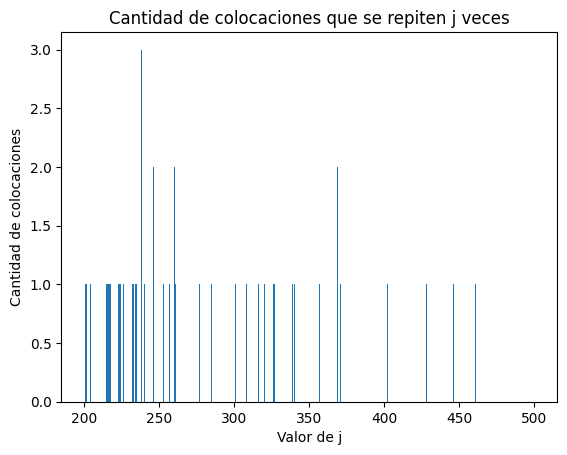

In [ ]:
import nltk
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import BigramAssocMeasures
import matplotlib.pyplot as plt

j = 200  # Valor inicial para j
i = 200  # Valor inicial para i
colocation_counts = []  # Lista para almacenar la cantidad de colocaciones repetidas
finder = BigramCollocationFinder.from_words(text1)

while j <= 500:
    # Obtener todas las colocaciones en el rango de frecuencia j
    colocaciones_j = [colocacion for colocacion, freq in finder.ngram_fd.items() if freq == j]

    colocation_counts.append(len(colocaciones_j))  # Agregar la cantidad de colocaciones repetidas

    j += 1  # Incrementar j en 1

# Crear un gráfico de barras para visualizar los resultados
x = range(200, 501)  # Valores de j en el eje x de (1 a 20)
y = colocation_counts  # Cantidad de colocaciones repetidas en el eje y

for i in range(len(colocation_counts)):
    if colocation_counts[i] > 0:
        print(f"colocaciones con freq = {i+200} : {colocation_counts[i]}")

    i += 1

print("\n")
plt.bar(x, y)
plt.xlabel('Valor de j')
plt.ylabel('Cantidad de colocaciones')
plt.title('Cantidad de colocaciones que se repiten j veces')
plt.show()

In [ ]:
collocations[:10]

[((',', 'and'), 0.009995437448958857),
 (('of', 'the'), 0.007081539305035293),
 (("'", 's'), 0.006659790889467408),
 (('in', 'the'), 0.004294165685782094),
 ((',', 'the'), 0.0034813414666876263),
 ((';', 'and'), 0.003270467258903684),
 (('to', 'the'), 0.0027298624716757596),
 (('.', 'But'), 0.0022851095970769),
 ((',', 'that'), 0.0022391006790149492),
 (('.', '"'), 0.0021355806133755593)]

# Referencias para seguir aprendiendo


*   [Mas sobre Colocaciones con NLTK](http://www.nltk.org/howto/collocations.html)
*   

